In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.io import fits
import glob
from astropy.visualization import make_lupton_rgb
from scipy import ndimage

In [2]:
hdul = fits.open("Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit")
hdul.info()


Filename: Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   (4096, 4096)   int16 (rescales to uint16)   


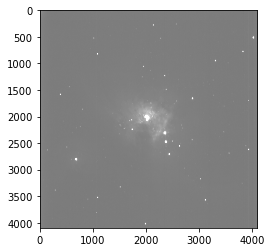

In [3]:
image= np.array(hdul[0].data)
plt.imshow(image,cmap="gray",vmax=np.mean(image)+np.std(image),vmin=np.mean(image)-np.std(image))

In [5]:
def Fits_Array(a):
    b=np.empty([4096,4096,0])
    for i in range(len(a)):
        x=fits.open(a[i])
        b=np.dstack((b,np.array(x[0].data)))
    return b

In [6]:
def insertar_rayos(x):
    b=np.empty([100,2,0],dtype=int)
    for n in range(np.size(x,axis=2)):
        p=(np.random.randint(0,4096,size=(100,2)))
        b=np.dstack((b,p))
    for i in range(50):
        for j in range(np.size(x,axis=2)):
            x[b[i,0,j],b[i,1,j],j]=60000
            x[b[i,0,j],b[i,1,j]+2,j]=60000
            x[b[i,0,j]+1,b[i,1,j],j]=60000
            x[b[i,0,j]+1,b[i,1,j]+1,j]=60000
            x[b[i,0,j]+1,b[i,1,j]+2,j]=60000
            x[b[i,0,j]+1,b[i,1,j]+3,j]=60000
            x[b[i,0,j]+2,b[i,1,j]+2,j]=60000
            x[b[i,0,j]+2,b[i,1,j]+3,j]=60000
            x[b[i,0,j]+3,b[i,1,j],j]=60000
            x[b[i,0,j]+3,b[i,1,j]+1,j]=60000
            x[b[i,0,j]+3,b[i,1,j]+2,j]=60000
    for i in range(50,100):
        for j in range(np.size(x,axis=2)):
            x[b[i,0,j],b[i,1,j],j]=60000
            x[b[i,0,j]+1,b[i,1,j]-1,j]=60000
            x[b[i,0,j]+1,b[i,1,j]+1,j]=60000
            x[b[i,0,j]+2,b[i,1,j]+2,j]=60000
            x[b[i,0,j]+2,b[i,1,j]-2,j]=60000
            x[b[i,0,j]+3,b[i,1,j]+2,j]=60000
            x[b[i,0,j]+3,b[i,1,j]-2,j]=60000
            x[b[i,0,j]+4,b[i,1,j]-1,j]=60000
            x[b[i,0,j]+3,b[i,1,j],j]=60000
            x[b[i,0,j]+4,b[i,1,j]+1,j]=60000
    return x
    

## 2.Reducción de imagenes

In [3]:
b=glob.glob('datos_OMA/BIAS*.fit')
d=glob.glob('datos_OMA/DARK_5*.fit')
fb=glob.glob('datos_OMA/FLAT_B*.fit')
fsg=glob.glob('datos_OMA/FLAT_sloan_g*.fit')
fsi=glob.glob('datos_OMA/FLAT_sloan_i*.fit')
fsr=glob.glob('datos_OMA/FLAT_sloan_r*fit')
fv=glob.glob('datos_OMA/FLAT_V*.fit')
Lb=glob.glob('datos_OMA/Light_NGC_1976_B*.fit')
Lsg=glob.glob('datos_OMA/Light_NGC_1976_sloan_g*.fit')
Lsi=glob.glob('datos_OMA/Light_NGC_1976_sloan_i*.fit')
Lsr=glob.glob('datos_OMA/Light_NGC_1976_sloan_r*.fit')
Lv=glob.glob('datos_OMA/Light_NGC_1976_v*.fit')
Lb2=glob.glob('datos_OMA/Light_NGC_104_B*.fit')
Lsg2=glob.glob('datos_OMA/Light_NGC_104_sloan_g*.fit')
Lsi2=glob.glob('datos_OMA/Light_NGC_104_sloan_i*.fit')
Lsr2=glob.glob('datos_OMA/Light_NGC_104_sloan_r*.fit')
Lv2=glob.glob('datos_OMA/Light_NGC_104_V*.fit')

### 4. 5. 6.

In [7]:
Bias=Fits_Array(b)
Dark=Fits_Array(d)
FLAT_B=Fits_Array(fb)
FLAT_sloan_g=Fits_Array(fsg)
FLAT_sloan_i=Fits_Array(fsi)
FLAT_sloan_r=Fits_Array(fsr)
FLAT_V=Fits_Array(fv)

In [8]:
Master_Bias=np.mean(Bias,axis=2)
Master_Dark=np.mean(Dark,axis=2)
Dark_Bias=(Master_Bias+Master_Dark)/2
Master_Flat_B=np.mean(FLAT_B,axis=2)
Master_Flat_V=np.mean(FLAT_V,axis=2)
Master_Flat_sloan_g=np.mean(FLAT_sloan_g,axis=2)
Master_Flat_sloan_i=np.mean(FLAT_sloan_i,axis=2)
Master_Flat_sloan_r=np.mean(FLAT_sloan_r,axis=2)

In [9]:
Norm_Master_Flat_B=(Master_Flat_B-Dark_Bias)/(np.median(Master_Flat_B-Dark_Bias))
Norm_Master_Flat_V=(Master_Flat_V-Dark_Bias)/(np.median(Master_Flat_V)-Dark_Bias)
Norm_Master_Flat_sloan_r=(Master_Flat_sloan_r-Dark_Bias)/(np.median(Master_Flat_sloan_r)-Dark_Bias)
Norm_Master_Flat_sloan_i=(Master_Flat_sloan_i-Dark_Bias)/(np.median(Master_Flat_sloan_i)-Dark_Bias)
Norm_Master_Flat_sloan_g=(Master_Flat_sloan_g-Dark_Bias)/(np.median(Master_Flat_sloan_g)-Dark_Bias)

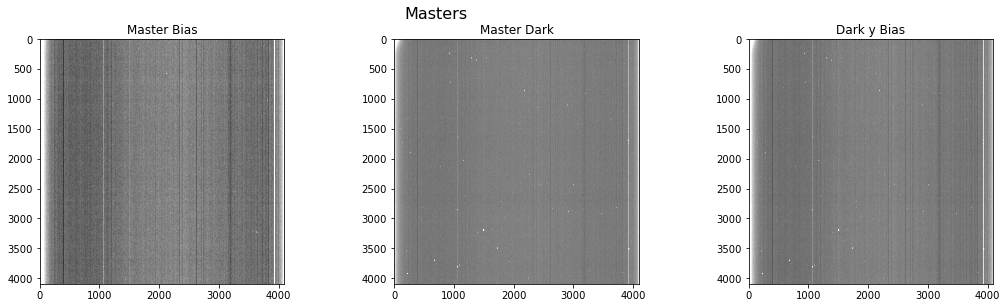

In [60]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Masters',x=0.45,fontsize=16)
ax[0].imshow(Master_Bias,cmap='gray',vmin=Master_Bias.mean()-Master_Bias.std(),vmax=Master_Bias.mean()+Master_Bias.std())
ax[0].set_title('Master Bias')
ax[1].imshow(Master_Dark,cmap='gray',vmin=Master_Dark.mean()-Master_Dark.std(),vmax=Master_Dark.mean()+Master_Dark.std())
ax[1].set_title('Master Dark')
ax[2].imshow(Dark_Bias,cmap='gray',vmin=Dark_Bias.mean()-Dark_Bias.std(),vmax=Dark_Bias.mean()+Dark_Bias.std())
ax[2].set_title('Dark y Bias')
fig.savefig('Masters.jpeg')

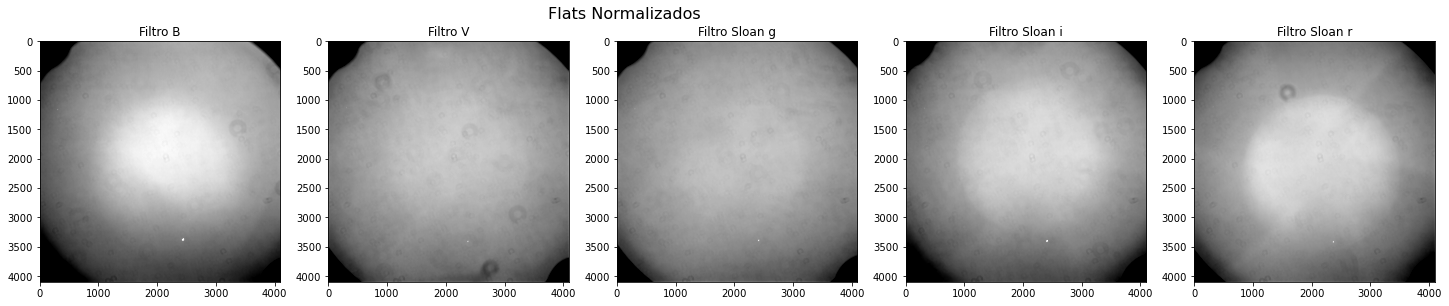

In [61]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Flats Normalizados',x=0.45,fontsize=16)
ax[0].imshow(Norm_Master_Flat_B,cmap='gray',vmin=Norm_Master_Flat_B.mean()-Norm_Master_Flat_B.std(),vmax=Norm_Master_Flat_B.mean()+Norm_Master_Flat_B.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Norm_Master_Flat_V,cmap='gray',vmin=Norm_Master_Flat_V.mean()-Norm_Master_Flat_V.std(),vmax=Norm_Master_Flat_V.mean()+Norm_Master_Flat_V.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Norm_Master_Flat_sloan_r,cmap='gray',vmin=Norm_Master_Flat_sloan_r.mean()-Norm_Master_Flat_sloan_r.std(),vmax=Norm_Master_Flat_sloan_r.mean()+Norm_Master_Flat_sloan_r.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Norm_Master_Flat_sloan_i,cmap='gray',vmin=Norm_Master_Flat_sloan_i.mean()-Norm_Master_Flat_sloan_i.std(),vmax=Norm_Master_Flat_sloan_i.mean()+Norm_Master_Flat_sloan_i.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Norm_Master_Flat_sloan_g,cmap='gray',vmin=Norm_Master_Flat_sloan_g.mean()-Norm_Master_Flat_sloan_g.std(),vmax=Norm_Master_Flat_sloan_g.mean()+Norm_Master_Flat_sloan_g.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Flats Normalizados.jpeg')

## Nebulosa de Orion ##

In [15]:
Light_B=Fits_Array(Lb)
Light_sloan_g=Fits_Array(Lsg)
Light_sloan_i=Fits_Array(Lsi)
Light_sloan_r=Fits_Array(Lsr)
Light_V=Fits_Array(Lv)

In [34]:
Raw_Orion_B=np.mean(Light_B,axis=2)
Raw_Orion_V=np.mean(Light_V,axis=2)
Raw_Orion_sloan_i=np.mean(Light_sloan_i,axis=2)
Raw_Orion_sloan_g=np.mean(Light_sloan_g,axis=2)
Raw_Orion_sloan_r=np.mean(Light_sloan_r,axis=2)

In [35]:
Orion_B=(Raw_Orion_B-Dark_Bias)/Norm_Master_Flat_B
Orion_V=(Raw_Orion_V-Dark_Bias)/Norm_Master_Flat_V
Orion_sloan_r=(Raw_Orion_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r
Orion_sloan_i=(Raw_Orion_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Orion_sloan_g=(Raw_Orion_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g

### 7. Rayos cosmicos

In [16]:
np.random.seed(312312)
Rayos_Orion_B=insertar_rayos(Light_B)
Rayos_Orion_V=insertar_rayos(Light_V)
Rayos_Orion_sloan_g=insertar_rayos(Light_sloan_g)
Rayos_Orion_sloan_i=insertar_rayos(Light_sloan_i)
Rayos_Orion_sloan_r=insertar_rayos(Light_sloan_r)

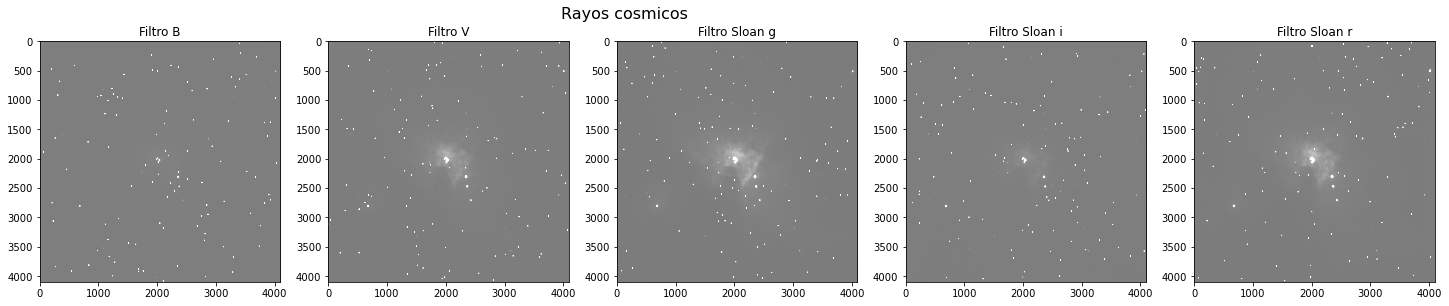

In [62]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Rayos cosmicos',x=0.45,fontsize=16)
ax[0].imshow(Rayos_Orion_B[:,:,0],cmap='gray',vmin=Rayos_Orion_B[:,:,0].mean()-Rayos_Orion_B[:,:,0].std(),vmax=Rayos_Orion_B[:,:,0].mean()+Rayos_Orion_B[:,:,0].std())
ax[0].set_title('Filtro B')
ax[1].imshow(Rayos_Orion_V[:,:,0],cmap='gray',vmin=Rayos_Orion_V[:,:,0].mean()-Rayos_Orion_V[:,:,0].std(),vmax=Rayos_Orion_V[:,:,0].mean()+Rayos_Orion_V[:,:,0].std())
ax[1].set_title('Filtro V')
ax[2].imshow(Rayos_Orion_sloan_g[:,:,0],cmap='gray',vmin=Rayos_Orion_sloan_g[:,:,0].mean()-Rayos_Orion_sloan_g[:,:,0].std(),vmax=Rayos_Orion_sloan_g[:,:,0].mean()+Rayos_Orion_sloan_g[:,:,0].std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Rayos_Orion_sloan_i[:,:,0],cmap='gray',vmin=Rayos_Orion_sloan_i[:,:,0].mean()-Rayos_Orion_sloan_i[:,:,0].std(),vmax=Rayos_Orion_sloan_i[:,:,0].mean()+Rayos_Orion_sloan_i[:,:,0].std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Rayos_Orion_sloan_r[:,:,0],cmap='gray',vmin=Rayos_Orion_sloan_r[:,:,0].mean()-Rayos_Orion_sloan_r[:,:,0].std(),vmax=Rayos_Orion_sloan_r[:,:,0].mean()+Rayos_Orion_sloan_r[:,:,0].std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Rayos Cosmicos')

### 8.

In [ ]:
Redux_Orion_B=np.median(Rayos_Orion_B,axis=2)
Redux_Orion_V=np.median(Rayos_Orion_V,axis=2)
Redux_Orion_sloan_g=np.median(Rayos_Orion_sloan_g,axis=2)
Redux_Orion_sloan_i=np.median(Rayos_Orion_sloan_i,axis=2)
Redux_Orion_sloan_r=np.median(Rayos_Orion_sloan_r,axis=2)

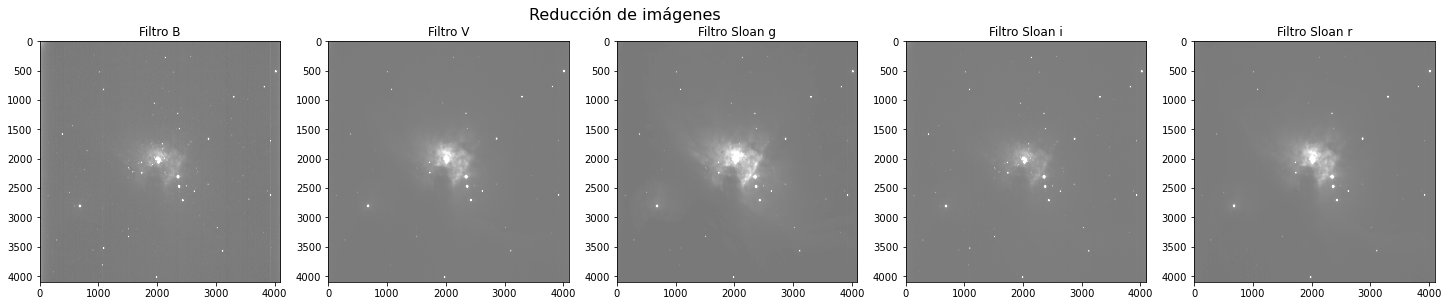

In [64]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Reducción de imágenes',x=0.45,fontsize=16)
ax[0].imshow(Redux_Orion_B,cmap='gray',vmin=Redux_Orion_B.mean()-Redux_Orion_B.std(),vmax=Redux_Orion_B.mean()+Redux_Orion_B.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Redux_Orion_V,cmap='gray',vmin=Redux_Orion_V.mean()-Redux_Orion_V.std(),vmax=Redux_Orion_V.mean()+Redux_Orion_V.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Redux_Orion_sloan_g,cmap='gray',vmin=Redux_Orion_sloan_g.mean()-Redux_Orion_sloan_g.std(),vmax=Redux_Orion_sloan_g.mean()+Redux_Orion_sloan_g.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Redux_Orion_sloan_i,cmap='gray',vmin=Redux_Orion_sloan_i.mean()-Redux_Orion_sloan_i.std(),vmax=Redux_Orion_sloan_i.mean()+Redux_Orion_sloan_i.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Redux_Orion_sloan_r,cmap='gray',vmin=Redux_Orion_sloan_r.mean()-Redux_Orion_sloan_r.std(),vmax=Redux_Orion_sloan_r.mean()+Redux_Orion_sloan_r.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Reducción de imágenes')

### 9.

In [11]:
OrionB=(Redux_Orion_B-Dark_Bias)/Norm_Master_Flat_B
OrionV=(Redux_Orion_V-Dark_Bias)/Norm_Master_Flat_V
Orionsloang=(Redux_Orion_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g
Orionsloani=(Redux_Orion_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Orionsloanr=(Redux_Orion_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r

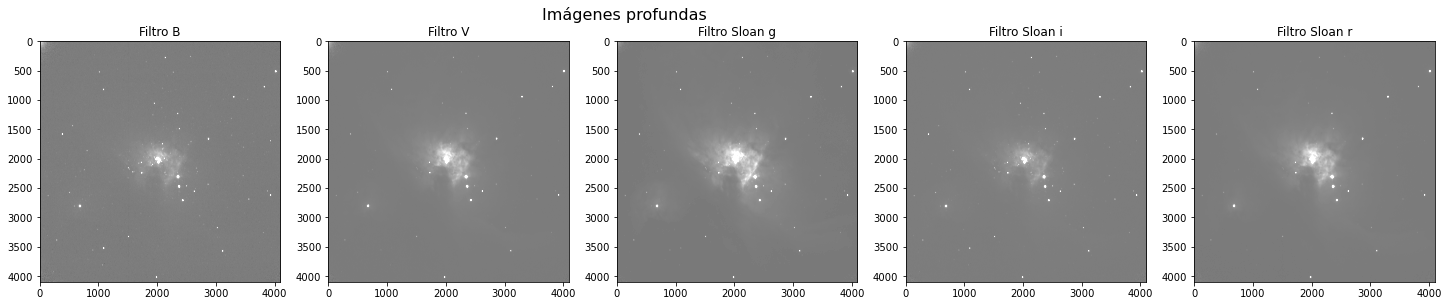

In [65]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imágenes profundas',x=0.45,fontsize=16)
ax[0].imshow(OrionB,cmap='gray',vmin=OrionB.mean()-OrionB.std(),vmax=OrionB.mean()+OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(OrionV,cmap='gray',vmin=OrionV.mean()-OrionV.std(),vmax=OrionV.mean()+OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Orionsloang,cmap='gray',vmin=Orionsloang.mean()-Orionsloang.std(),vmax=Orionsloang.mean()+Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Orionsloani,cmap='gray',vmin=Orionsloani.mean()-Orionsloani.std(),vmax=Orionsloani.mean()+Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Orionsloanr,cmap='gray',vmin=Orionsloanr.mean()-Orionsloanr.std(),vmax=Orionsloanr.mean()+Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Imágenes profundas')

### 10.

In [66]:
BackgroundB=OrionB[270:300,270:300]
BackgroundV=OrionV[270:300,270:300]
Backgroundslg=Orionsloang[270:300,270:300]
Backgroundsli=Orionsloani[270:300,270:300]
Backgroundslr=Orionsloanr[270:300,270:300]

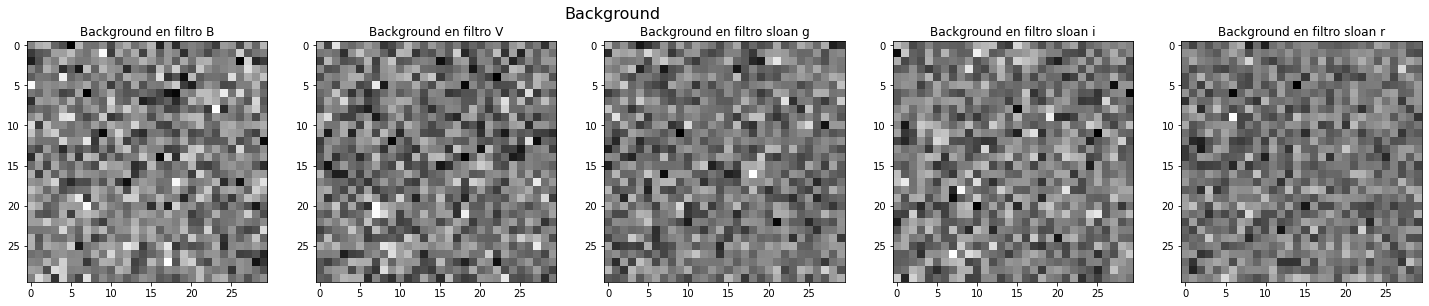

In [78]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Background',x=0.45,fontsize=16)
ax[0].imshow(BackgroundB,cmap='gray')
ax[0].set_title('Background en filtro B')
ax[1].imshow(BackgroundV,cmap='gray')
ax[1].set_title('Background en filtro V')
ax[2].imshow(Backgroundslg,cmap='gray')
ax[2].set_title('Background en filtro sloan g')
ax[3].imshow(Backgroundsli,cmap='gray')
ax[3].set_title('Background en filtro sloan i')
ax[4].imshow(Backgroundslr,cmap='gray')
ax[4].set_title('Background en filtro sloan r')
fig.savefig('Background')

## Manipulación de imagenes ##

### 11. ###

In [18]:
Logaritmo_OrionB=np.log(OrionB+218)
Sen_OrionB=np.sin(OrionB)
Raiz_OrionB=np.sqrt(Orion_B+218)
Cuadrado_OrionB=np.square(OrionB)
Doble_OrionB=2*OrionB

In [19]:
Logaritmo_OrionV=np.log(OrionV+354)
Sen_OrionV=np.sin(OrionV)
Raiz_OrionV=np.sqrt(OrionV+354)
Cuadrado_OrionV=np.square(OrionV)
Doble_OrionV=2*OrionV

In [20]:
Logaritmo_Orionsloani=np.log(Orionsloani+257)
Sen_Orionsloani=np.sin(Orionsloani)
Raiz_Orionsloani=np.sqrt(Orionsloani+257)
Cuadrado_Orionsloani=np.square(Orionsloani)
Doble_Orionsloani=2*Orionsloani

In [21]:
Logaritmo_Orionsloang=np.log(Orionsloang+294)
Sen_Orionsloang=np.sin(Orionsloang)
Raiz_Orionsloang=np.sqrt(Orionsloang+294)
Cuadrado_Orionsloang=np.square(Orionsloang)
Doble_Orionsloang=2*Orionsloang

In [22]:
Logaritmo_Orionsloanr=np.log(Orionsloanr+380)
Sen_Orionsloanr=np.sin(Orionsloanr)
Raiz_Orionsloanr=np.sqrt(Orionsloanr+380)
Cuadrado_Orionsloanr=np.square(Orionsloanr)
Doble_Orionsloanr=2*Orionsloanr

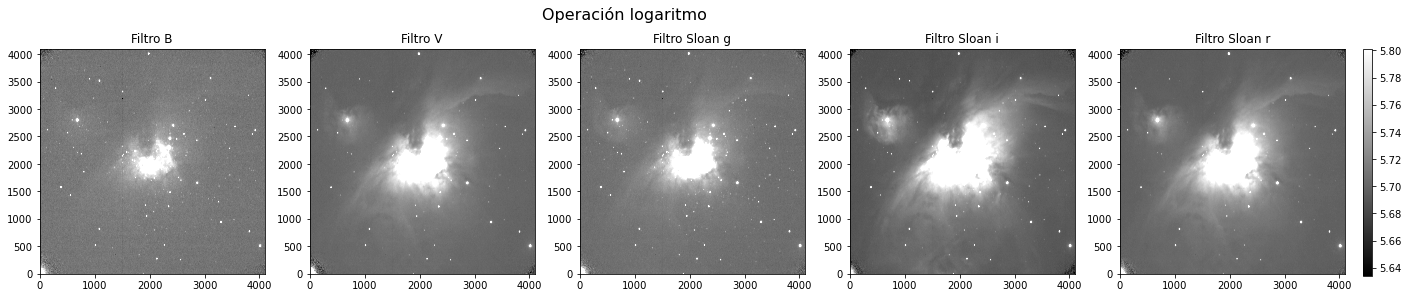

In [79]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Operación logaritmo',x=0.45,fontsize=16)
ax[0].imshow(Logaritmo_OrionB,cmap='gray',vmin=Logaritmo_OrionB.mean()-Logaritmo_OrionB.std(),vmax=Logaritmo_OrionB.mean()+Logaritmo_OrionB.std(),origin='lower')
ax[0].set_title('Filtro B')
ax[1].imshow(Logaritmo_OrionV,cmap='gray',vmin=Logaritmo_OrionV.mean()-Logaritmo_OrionV.std(),vmax=Logaritmo_OrionV.mean()+Logaritmo_OrionV.std(),origin='lower')
ax[1].set_title('Filtro V')
ax[2].imshow(Logaritmo_Orionsloani,cmap='gray',vmin=Logaritmo_Orionsloani.mean()-Logaritmo_Orionsloani.std(),vmax=Logaritmo_Orionsloani.mean()+Logaritmo_Orionsloani.std(),origin='lower')
ax[2].set_title('Filtro Sloan g')
im=ax[3].imshow(Logaritmo_Orionsloang,cmap='gray',vmin=Logaritmo_Orionsloang.mean()-Logaritmo_Orionsloang.std(),vmax=Logaritmo_Orionsloang.mean()+Logaritmo_Orionsloang.std(),origin='lower')
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Logaritmo_Orionsloanr,cmap='gray',vmin=Logaritmo_Orionsloanr.mean()-Logaritmo_Orionsloanr.std(),vmax=Logaritmo_Orionsloanr.mean()+Logaritmo_Orionsloanr.std(),origin='lower')
ax[4].set_title('Filtro Sloan r')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.005, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('Logaritmo')

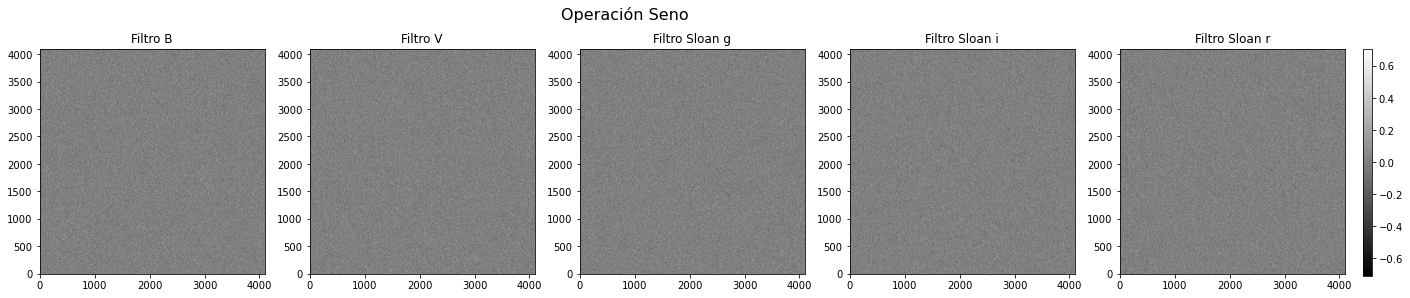

In [80]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Operación Seno',x=0.45,fontsize=16)
ax[0].imshow(Sen_OrionB,cmap='gray',vmin=Sen_OrionB.mean()-Sen_OrionB.std(),vmax=Sen_OrionB.mean()+Sen_OrionB.std(),origin='lower')
ax[0].set_title('Filtro B')
ax[1].imshow(Sen_OrionV,cmap='gray',vmin=Sen_OrionV.mean()-Sen_OrionV.std(),vmax=Sen_OrionV.mean()+Sen_OrionV.std(),origin='lower')
ax[1].set_title('Filtro V')
ax[2].imshow(Sen_Orionsloani,cmap='gray',vmin=Sen_Orionsloani.mean()-Sen_Orionsloani.std(),vmax=Sen_Orionsloani.mean()+Sen_Orionsloani.std(),origin='lower')
ax[2].set_title('Filtro Sloan g')
im=ax[3].imshow(Sen_Orionsloang,cmap='gray',vmin=Sen_Orionsloang.mean()-Sen_Orionsloang.std(),vmax=Sen_Orionsloang.mean()+Sen_Orionsloang.std(),origin='lower')
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Sen_Orionsloanr,cmap='gray',vmin=Sen_Orionsloanr.mean()-Sen_Orionsloanr.std(),vmax=Sen_Orionsloanr.mean()+Sen_Orionsloanr.std(),origin='lower')
ax[4].set_title('Filtro Sloan r')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.005, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('Seno')

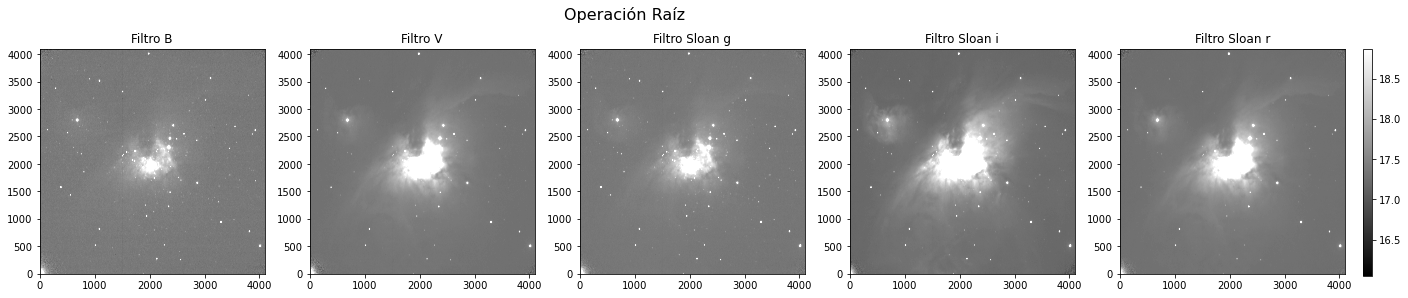

In [81]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Operación Raíz',x=0.45,fontsize=16)
ax[0].imshow(Raiz_OrionB,cmap='gray',vmin=Raiz_OrionB.mean()-Raiz_OrionB.std(),vmax=Raiz_OrionB.mean()+Raiz_OrionB.std(),origin='lower')
ax[0].set_title('Filtro B')
ax[1].imshow(Raiz_OrionV,cmap='gray',vmin=Raiz_OrionV.mean()-Raiz_OrionV.std(),vmax=Raiz_OrionV.mean()+Raiz_OrionV.std(),origin='lower')
ax[1].set_title('Filtro V')
ax[2].imshow(Raiz_Orionsloani,cmap='gray',vmin=Raiz_Orionsloani.mean()-Raiz_Orionsloani.std(),vmax=Raiz_Orionsloani.mean()+Raiz_Orionsloani.std(),origin='lower')
ax[2].set_title('Filtro Sloan g')
im=ax[3].imshow(Raiz_Orionsloang,cmap='gray',vmin=Raiz_Orionsloang.mean()-Raiz_Orionsloang.std(),vmax=Raiz_Orionsloang.mean()+Raiz_Orionsloang.std(),origin='lower')
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Raiz_Orionsloanr,cmap='gray',vmin=Raiz_Orionsloanr.mean()-Raiz_Orionsloanr.std(),vmax=Raiz_Orionsloanr.mean()+Raiz_Orionsloanr.std(),origin='lower')
ax[4].set_title('Filtro Sloan r')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.005, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('Raíz')

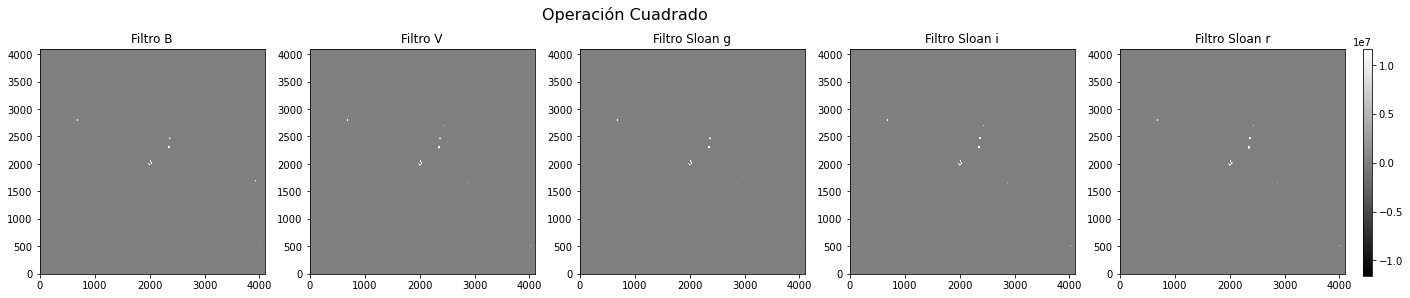

In [82]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Operación Cuadrado',x=0.45,fontsize=16)
ax[0].imshow(Cuadrado_OrionB,cmap='gray',vmin=Cuadrado_OrionB.mean()-Cuadrado_OrionB.std(),vmax=Cuadrado_OrionB.mean()+Cuadrado_OrionB.std(),origin='lower')
ax[0].set_title('Filtro B')
ax[1].imshow(Cuadrado_OrionV,cmap='gray',vmin=Cuadrado_OrionV.mean()-Cuadrado_OrionV.std(),vmax=Cuadrado_OrionV.mean()+Cuadrado_OrionV.std(),origin='lower')
ax[1].set_title('Filtro V')
ax[2].imshow(Cuadrado_Orionsloani,cmap='gray',vmin=Cuadrado_Orionsloani.mean()-Cuadrado_Orionsloani.std(),vmax=Cuadrado_Orionsloani.mean()+Cuadrado_Orionsloani.std(),origin='lower')
ax[2].set_title('Filtro Sloan g')
im=ax[3].imshow(Cuadrado_Orionsloang,cmap='gray',vmin=Cuadrado_Orionsloang.mean()-Cuadrado_Orionsloang.std(),vmax=Cuadrado_Orionsloang.mean()+Cuadrado_Orionsloang.std(),origin='lower')
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Cuadrado_Orionsloanr,cmap='gray',vmin=Cuadrado_Orionsloanr.mean()-Cuadrado_Orionsloanr.std(),vmax=Cuadrado_Orionsloanr.mean()+Cuadrado_Orionsloanr.std(),origin='lower')
ax[4].set_title('Filtro Sloan r')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.005, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('Cuadrado')

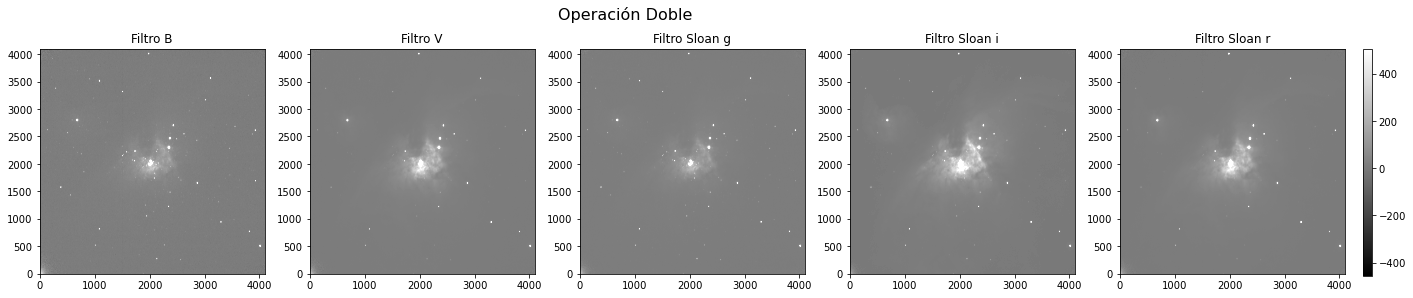

In [83]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Operación Doble',x=0.45,fontsize=16)
ax[0].imshow(Doble_OrionB,cmap='gray',vmin=Doble_OrionB.mean()-Doble_OrionB.std(),vmax=Doble_OrionB.mean()+Doble_OrionB.std(),origin='lower')
ax[0].set_title('Filtro B')
ax[1].imshow(Doble_OrionV,cmap='gray',vmin=Doble_OrionV.mean()-Doble_OrionV.std(),vmax=Doble_OrionV.mean()+Doble_OrionV.std(),origin='lower')
ax[1].set_title('Filtro V')
ax[2].imshow(Doble_Orionsloani,cmap='gray',vmin=Doble_Orionsloani.mean()-Doble_Orionsloani.std(),vmax=Doble_Orionsloani.mean()+Doble_Orionsloani.std(),origin='lower')
ax[2].set_title('Filtro Sloan g')
im=ax[3].imshow(Doble_Orionsloang,cmap='gray',vmin=Doble_Orionsloang.mean()-Doble_Orionsloang.std(),vmax=Doble_Orionsloang.mean()+Doble_Orionsloang.std(),origin='lower')
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Doble_Orionsloanr,cmap='gray',vmin=Doble_Orionsloanr.mean()-Doble_Orionsloanr.std(),vmax=Doble_Orionsloanr.mean()+Doble_Orionsloanr.std(),origin='lower')
ax[4].set_title('Filtro Sloan r')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.005, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('Doble')

### 12. 

In [19]:
boxcar=np.ones([3,3])/9
identidad=np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,1,0,0],[0,0,0,0,0],[0,0,0,0,0]])

In [20]:
Gauss_OrionB=ndimage.gaussian_filter(OrionB,1)
Laplace_OrionB=ndimage.uniform_filter(OrionB)
Boxcar_OrionB=ndimage.convolve(OrionB,boxcar)
Idn_OrionB=ndimage.convolve(OrionB,identidad)

In [21]:
Gauss_OrionV=ndimage.gaussian_filter(OrionV,1)
Laplace_OrionV=ndimage.uniform_filter(OrionV)
Boxcar_OrionV=ndimage.convolve(OrionV,boxcar)
Idn_OrionV=ndimage.convolve(OrionV,identidad)

In [22]:
Gauss_Orionsloang=ndimage.gaussian_filter(Orionsloang,1)
Laplace_Orionsloang=ndimage.uniform_filter(Orionsloang)
Boxcar_Orionsloang=ndimage.convolve(Orionsloang,boxcar)
Idn_Orionsloang=ndimage.convolve(Orionsloang,identidad)

In [23]:
Gauss_Orionsloani=ndimage.gaussian_filter(Orionsloani,1)
Laplace_Orionsloani=ndimage.uniform_filter(Orionsloani)
Boxcar_Orionsloani=ndimage.convolve(Orionsloani,boxcar)
Idn_Orionsloani=ndimage.convolve(Orionsloani,identidad)

In [24]:
Gauss_Orionsloanr=ndimage.gaussian_filter(Orionsloanr,1)
Laplace_Orionsloanr=ndimage.uniform_filter(Orionsloanr)
Boxcar_Orionsloanr=ndimage.convolve(Orionsloanr,boxcar)
Idn_Orionsloanr=ndimage.convolve(Orionsloanr,identidad)

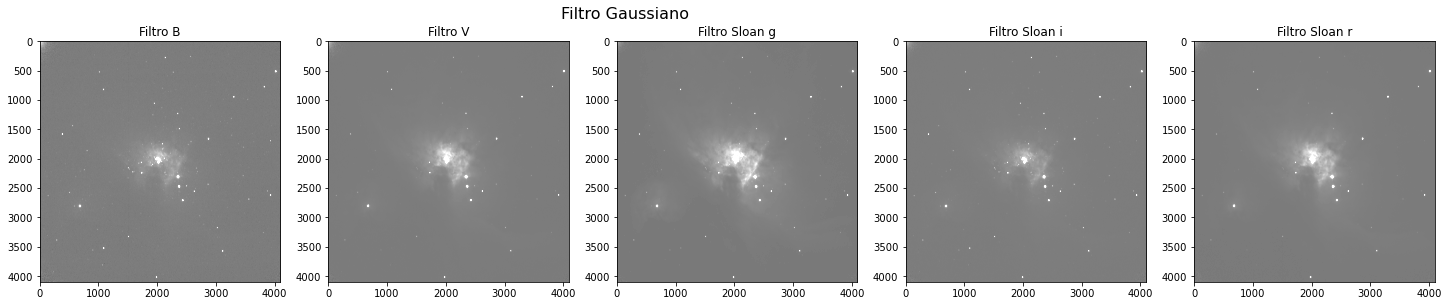

In [84]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Filtro Gaussiano',x=0.45,fontsize=16)
ax[0].imshow(Gauss_OrionB,cmap='gray',vmin=Gauss_OrionB.mean()-Gauss_OrionB.std(),vmax=Gauss_OrionB.mean()+Gauss_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Gauss_OrionV,cmap='gray',vmin=Gauss_OrionV.mean()-Gauss_OrionV.std(),vmax=Gauss_OrionV.mean()+Gauss_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Gauss_Orionsloang,cmap='gray',vmin=Gauss_Orionsloang.mean()-Gauss_Orionsloang.std(),vmax=Gauss_Orionsloang.mean()+Gauss_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Gauss_Orionsloani,cmap='gray',vmin=Gauss_Orionsloani.mean()-Gauss_Orionsloani.std(),vmax=Gauss_Orionsloani.mean()+Gauss_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Gauss_Orionsloanr,cmap='gray',vmin=Gauss_Orionsloanr.mean()-Gauss_Orionsloanr.std(),vmax=Gauss_Orionsloanr.mean()+Gauss_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Filtro Gaussiano')

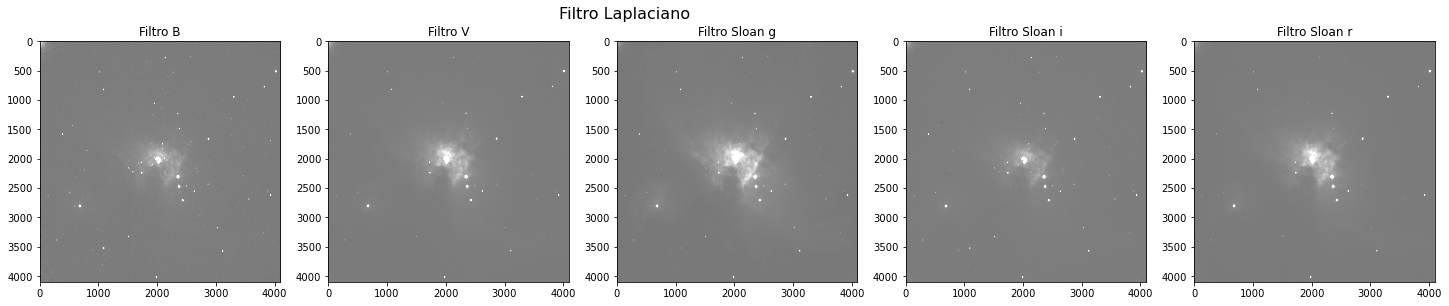

In [85]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Filtro Laplaciano',x=0.45,fontsize=16)
ax[0].imshow(Laplace_OrionB,cmap='gray',vmin=Laplace_OrionB.mean()-Laplace_OrionB.std(),vmax=Laplace_OrionB.mean()+Laplace_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Laplace_OrionV,cmap='gray',vmin=Laplace_OrionV.mean()-Laplace_OrionV.std(),vmax=Laplace_OrionV.mean()+Laplace_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Laplace_Orionsloang,cmap='gray',vmin=Laplace_Orionsloang.mean()-Laplace_Orionsloang.std(),vmax=Laplace_Orionsloang.mean()+Laplace_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Laplace_Orionsloani,cmap='gray',vmin=Laplace_Orionsloani.mean()-Laplace_Orionsloani.std(),vmax=Laplace_Orionsloani.mean()+Laplace_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Laplace_Orionsloanr,cmap='gray',vmin=Laplace_Orionsloanr.mean()-Laplace_Orionsloanr.std(),vmax=Laplace_Orionsloanr.mean()+Laplace_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Filtro Laplaciano')

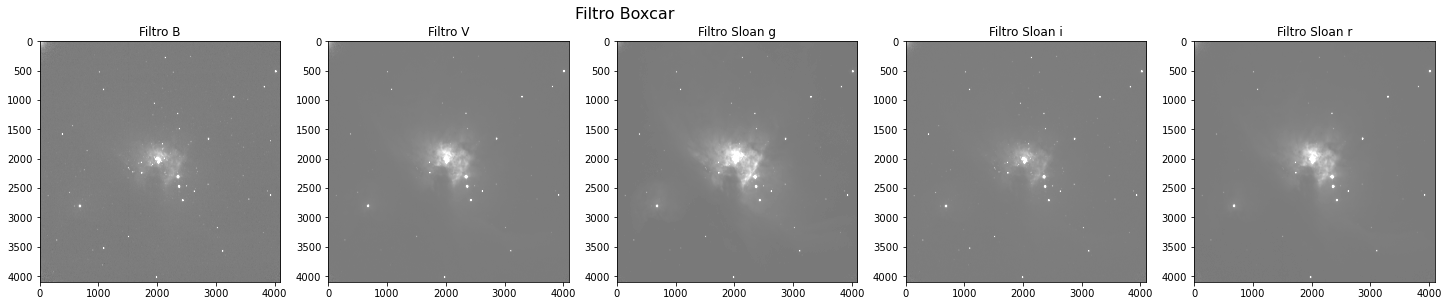

In [87]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Filtro Boxcar',x=0.45,fontsize=16)
ax[0].imshow(Boxcar_OrionB,cmap='gray',vmin=Boxcar_OrionB.mean()-Boxcar_OrionB.std(),vmax=Boxcar_OrionB.mean()+Boxcar_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Boxcar_OrionV,cmap='gray',vmin=Boxcar_OrionV.mean()-Boxcar_OrionV.std(),vmax=Boxcar_OrionV.mean()+Boxcar_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Boxcar_Orionsloang,cmap='gray',vmin=Boxcar_Orionsloang.mean()-Boxcar_Orionsloang.std(),vmax=Boxcar_Orionsloang.mean()+Boxcar_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Boxcar_Orionsloani,cmap='gray',vmin=Boxcar_Orionsloani.mean()-Boxcar_Orionsloani.std(),vmax=Boxcar_Orionsloani.mean()+Boxcar_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Boxcar_Orionsloanr,cmap='gray',vmin=Boxcar_Orionsloanr.mean()-Boxcar_Orionsloanr.std(),vmax=Boxcar_Orionsloanr.mean()+Boxcar_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Filtro Boxcar')

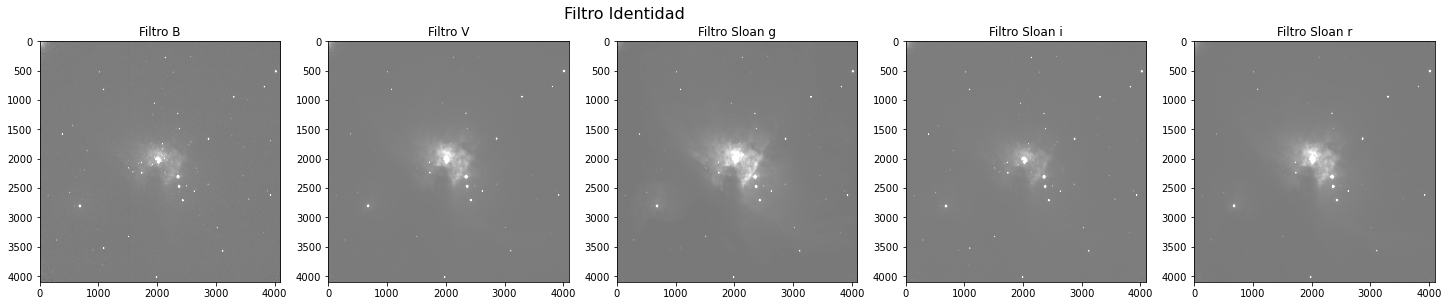

In [88]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Filtro Identidad',x=0.45,fontsize=16)
ax[0].imshow(Idn_OrionB,cmap='gray',vmin=Idn_OrionB.mean()-Idn_OrionB.std(),vmax=Idn_OrionB.mean()+Idn_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Idn_OrionV,cmap='gray',vmin=Idn_OrionV.mean()-Idn_OrionV.std(),vmax=Idn_OrionV.mean()+Idn_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Idn_Orionsloang,cmap='gray',vmin=Idn_Orionsloang.mean()-Idn_Orionsloang.std(),vmax=Idn_Orionsloang.mean()+Idn_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Idn_Orionsloani,cmap='gray',vmin=Idn_Orionsloani.mean()-Idn_Orionsloani.std(),vmax=Idn_Orionsloani.mean()+Idn_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Idn_Orionsloanr,cmap='gray',vmin=Idn_Orionsloanr.mean()-Idn_Orionsloanr.std(),vmax=Idn_Orionsloanr.mean()+Idn_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Filtro Identidad')

### 13.

In [27]:
Sharpened_Ga_OrionB=2*Idn_OrionB-Gauss_OrionB
Sharpened_La_OrionB=OrionB-Laplace_OrionB

In [28]:
Sharpened_Ga_OrionV=2*Idn_OrionV-Gauss_OrionV
Sharpened_La_OrionV=OrionV-Laplace_OrionV

In [29]:
Sharpened_Ga_Orionsloang=2*Idn_Orionsloang-Gauss_Orionsloang
Sharpened_La_Orionsloang=Orionsloang-Laplace_Orionsloang

In [30]:
Sharpened_Ga_Orionsloani=2*Idn_Orionsloani-Gauss_Orionsloani
Sharpened_La_Orionsloani=Orionsloani-Laplace_Orionsloani

In [31]:
Sharpened_Ga_Orionsloanr=2*Idn_Orionsloanr-Gauss_Orionsloanr
Sharpened_La_Orionsloanr=Orionsloanr-Laplace_Orionsloanr

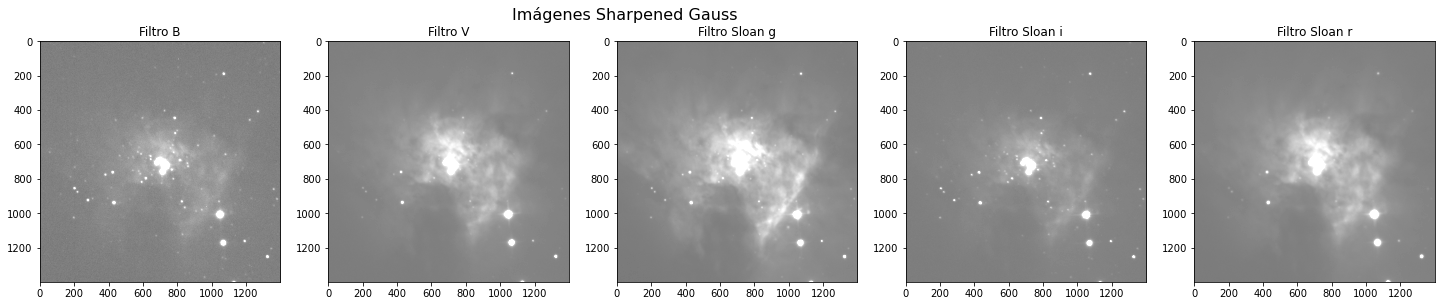

In [90]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imágenes Sharpened Gauss',x=0.45,fontsize=16)
ax[0].imshow(Sharpened_Ga_OrionB[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_Ga_OrionB.mean()-Sharpened_Ga_OrionB.std(),vmax=Sharpened_Ga_OrionB.mean()+Sharpened_Ga_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Sharpened_Ga_OrionV[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_Ga_OrionV.mean()-Sharpened_Ga_OrionV.std(),vmax=Sharpened_Ga_OrionV.mean()+Sharpened_Ga_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Sharpened_Ga_Orionsloang[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_Ga_Orionsloang.mean()-Sharpened_Ga_Orionsloang.std(),vmax=Sharpened_Ga_Orionsloang.mean()+Sharpened_Ga_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Sharpened_Ga_Orionsloani[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_Ga_Orionsloani.mean()-Sharpened_Ga_Orionsloani.std(),vmax=Sharpened_Ga_Orionsloani.mean()+Sharpened_Ga_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Sharpened_Ga_Orionsloanr[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_Ga_Orionsloanr.mean()-Sharpened_Ga_Orionsloanr.std(),vmax=Sharpened_Ga_Orionsloanr.mean()+Sharpened_Ga_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Imágenes Sharpened Gauss')

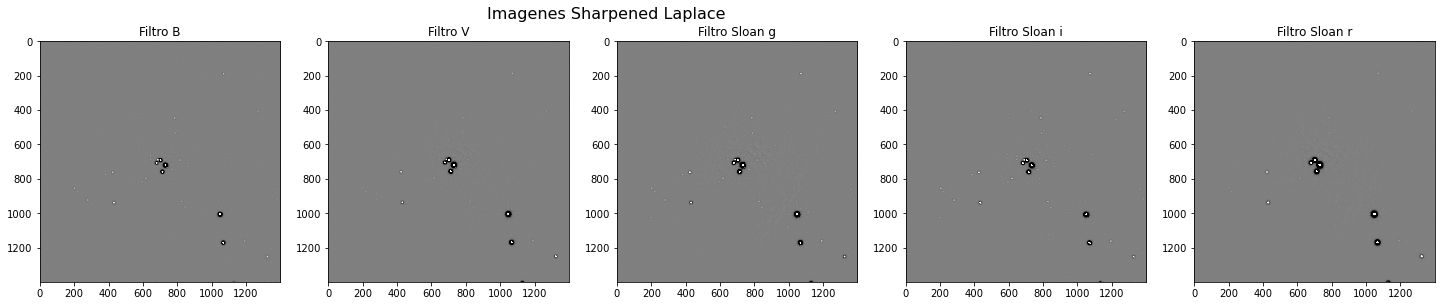

In [89]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imagenes Sharpened Laplace',x=0.44,fontsize=16)
ax[0].imshow(Sharpened_La_OrionB[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_La_OrionB.mean()-Sharpened_La_OrionB.std(),vmax=Sharpened_La_OrionB.mean()+Sharpened_La_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Sharpened_La_OrionV[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_La_OrionV.mean()-Sharpened_La_OrionV.std(),vmax=Sharpened_La_OrionV.mean()+Sharpened_La_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Sharpened_La_Orionsloang[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_La_Orionsloang.mean()-Sharpened_La_Orionsloang.std(),vmax=Sharpened_La_Orionsloang.mean()+Sharpened_La_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Sharpened_La_Orionsloani[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_La_Orionsloani.mean()-Sharpened_La_Orionsloani.std(),vmax=Sharpened_La_Orionsloani.mean()+Sharpened_La_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Sharpened_La_Orionsloanr[1300:2700,1300:2700],cmap='gray',vmin=Sharpened_La_Orionsloanr.mean()-Sharpened_La_Orionsloanr.std(),vmax=Sharpened_La_Orionsloanr.mean()+Sharpened_La_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Imágenes Sharpened Laplace')

In [91]:
np.amin(Sharpened_Ga_OrionB)

-952.3348164020814

### 14.Filtros

In [93]:
Filtro1=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]) #Nitidez
Filtro2=np.array([[-2,-2,-2],[-2,40,-2],[-2,-2,-2]]) #Suavizado
Filtro3=np.array([[-5,2,-5],[-2,5,-2],[-5,2,-5]]) #Difuminado

In [94]:
Nit_OrionB=ndimage.convolve(OrionB,Filtro1)
Suav_OrionB=ndimage.convolve(OrionB,Filtro2)
Dif_OrionB=ndimage.convolve(OrionB,Filtro3)

In [95]:
Nit_OrionV=ndimage.convolve(OrionV,Filtro1)
Suav_OrionV=ndimage.convolve(OrionV,Filtro2)
Dif_OrionV=ndimage.convolve(OrionV,Filtro3)

In [96]:
Nit_Orionsloang=ndimage.convolve(Orionsloang,Filtro1)
Suav_Orionsloang=ndimage.convolve(Orionsloang,Filtro2)
Dif_Orionsloang=ndimage.convolve(Orionsloang,Filtro3)

In [97]:
Nit_Orionsloani=ndimage.convolve(Orionsloani,Filtro1)
Suav_Orionsloani=ndimage.convolve(Orionsloani,Filtro2)
Dif_Orionsloani=ndimage.convolve(Orionsloani,Filtro3)

In [98]:
Nit_Orionsloanr=ndimage.convolve(Orionsloanr,Filtro1)
Suav_Orionsloanr=ndimage.convolve(Orionsloanr,Filtro2)
Dif_Orionsloanr=ndimage.convolve(Orionsloanr,Filtro3)

Text(0.5, 1.0, 'Filtro Sloan r')

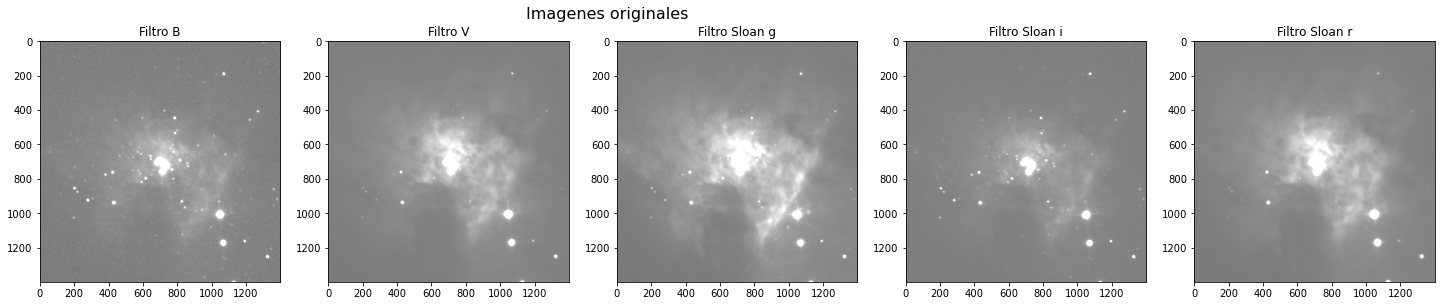

In [99]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imagenes originales',x=0.44,fontsize=16)
ax[0].imshow(OrionB[1300:2700,1300:2700],cmap='gray',vmin=OrionB.mean()-OrionB.std(),vmax=OrionB.mean()+OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(OrionV[1300:2700,1300:2700],cmap='gray',vmin=OrionV.mean()-OrionV.std(),vmax=OrionV.mean()+OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Orionsloang[1300:2700,1300:2700],cmap='gray',vmin=Orionsloang.mean()-Orionsloang.std(),vmax=Orionsloang.mean()+Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Orionsloani[1300:2700,1300:2700],cmap='gray',vmin=Orionsloani.mean()-Orionsloani.std(),vmax=Orionsloani.mean()+Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Orionsloanr[1300:2700,1300:2700],cmap='gray',vmin=Orionsloanr.mean()-Orionsloanr.std(),vmax=Orionsloanr.mean()+Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Imágenes Originales')

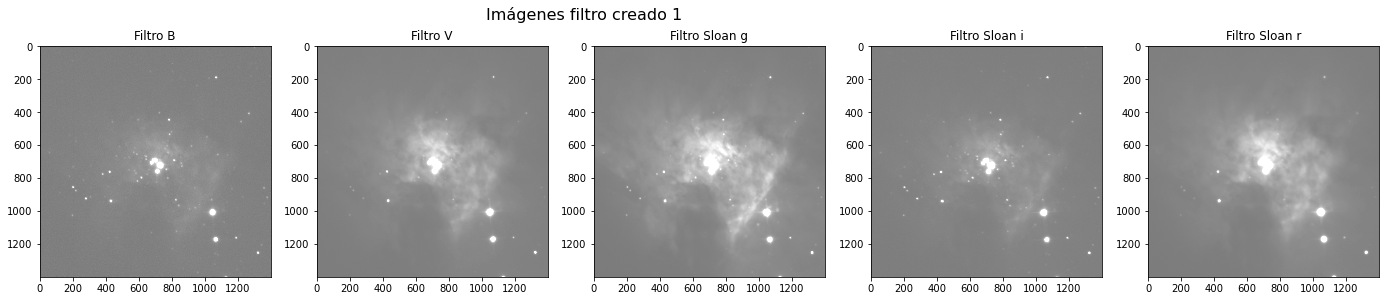

In [101]:
fig,ax=plt.subplots(1,5,figsize=(24,4.5))
fig.suptitle('Imágenes filtro creado 1',x=0.44,fontsize=16)
ax[0].imshow(Nit_OrionB[1300:2700,1300:2700],cmap='gray',vmin=Nit_OrionB.mean()-Nit_OrionB.std(),vmax=Nit_OrionB.mean()+Nit_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Nit_OrionV[1300:2700,1300:2700],cmap='gray',vmin=Nit_OrionV.mean()-Nit_OrionV.std(),vmax=Nit_OrionV.mean()+Nit_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Nit_Orionsloang[1300:2700,1300:2700],cmap='gray',vmin=Nit_Orionsloang.mean()-Nit_Orionsloang.std(),vmax=Nit_Orionsloang.mean()+Nit_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Nit_Orionsloani[1300:2700,1300:2700],cmap='gray',vmin=Nit_Orionsloani.mean()-Nit_Orionsloani.std(),vmax=Nit_Orionsloani.mean()+Nit_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Nit_Orionsloanr[1300:2700,1300:2700],cmap='gray',vmin=Nit_Orionsloanr.mean()-Nit_Orionsloanr.std(),vmax=Nit_Orionsloanr.mean()+Nit_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Imágenes Filtro 1')

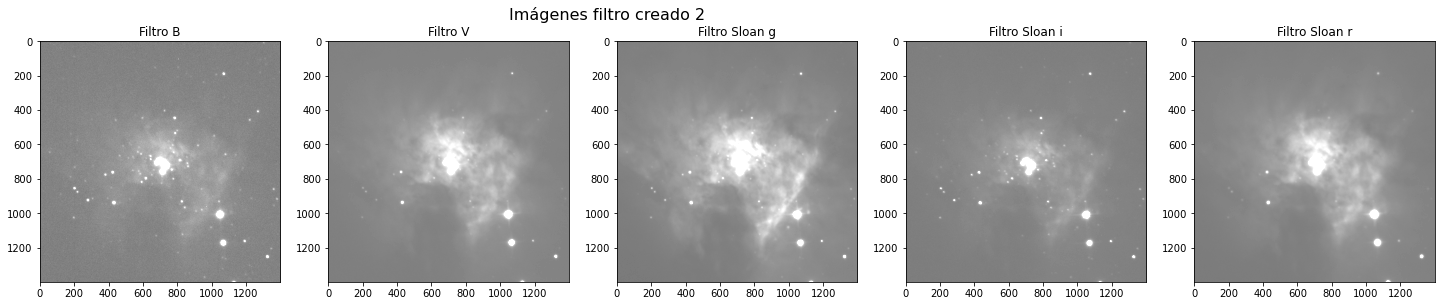

In [103]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imágenes filtro creado 2',x=0.44,fontsize=16)
ax[0].imshow(Suav_OrionB[1300:2700,1300:2700],cmap='gray',vmin=Suav_OrionB.mean()-Suav_OrionB.std(),vmax=Nit_OrionB.mean()+Suav_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Suav_OrionV[1300:2700,1300:2700],cmap='gray',vmin=Suav_OrionV.mean()-Suav_OrionV.std(),vmax=Nit_OrionV.mean()+Suav_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Suav_Orionsloang[1300:2700,1300:2700],cmap='gray',vmin=Suav_Orionsloang.mean()-Suav_Orionsloang.std(),vmax=Suav_Orionsloang.mean()+Suav_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Suav_Orionsloani[1300:2700,1300:2700],cmap='gray',vmin=Suav_Orionsloani.mean()-Suav_Orionsloani.std(),vmax=Suav_Orionsloani.mean()+Suav_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Suav_Orionsloanr[1300:2700,1300:2700],cmap='gray',vmin=Suav_Orionsloanr.mean()-Suav_Orionsloanr.std(),vmax=Suav_Orionsloanr.mean()+Suav_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Imágenes Filtro 2')

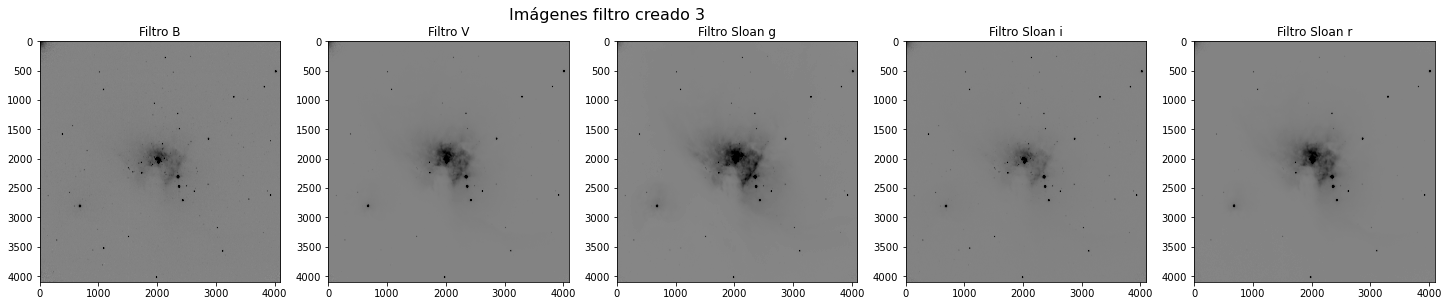

In [104]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imágenes filtro creado 3',x=0.44,fontsize=16)
ax[0].imshow(Dif_OrionB,cmap='gray',vmin=Dif_OrionB.mean()-Dif_OrionB.std(),vmax=Dif_OrionB.mean()+Dif_OrionB.std())
ax[0].set_title('Filtro B')
ax[1].imshow(Dif_OrionV,cmap='gray',vmin=Dif_OrionV.mean()-Dif_OrionV.std(),vmax=Dif_OrionV.mean()+Dif_OrionV.std())
ax[1].set_title('Filtro V')
ax[2].imshow(Dif_Orionsloang,cmap='gray',vmin=Dif_Orionsloang.mean()-Dif_Orionsloang.std(),vmax=Dif_Orionsloang.mean()+Dif_Orionsloang.std())
ax[2].set_title('Filtro Sloan g')
ax[3].imshow(Dif_Orionsloani,cmap='gray',vmin=Dif_Orionsloani.mean()-Dif_Orionsloani.std(),vmax=Dif_Orionsloani.mean()+Dif_Orionsloani.std())
ax[3].set_title('Filtro Sloan i')
ax[4].imshow(Dif_Orionsloanr,cmap='gray',vmin=Dif_Orionsloanr.mean()-Dif_Orionsloanr.std(),vmax=Dif_Orionsloanr.mean()+Dif_Orionsloanr.std())
ax[4].set_title('Filtro Sloan r')
fig.savefig('Imágenes Filtro 2')

# Orion mediana

In [12]:
OrionRGB1=make_lupton_rgb(Orionsloanr,OrionV,Orionsloang,minimum=9,Q=5,stretch=5,filename='Orion1.jpeg')
OrionRGB2=make_lupton_rgb(Orionsloani,Orionsloanr,Orionsloang,minimum=9,Q=5,stretch=5,filename='Orion2.jpeg')
OrionRGB3=make_lupton_rgb(Orionsloani,OrionV,OrionB,minimum=9,Q=5,stretch=5,filename='Orion3.jpeg')
OrionRGB4=make_lupton_rgb(Orionsloani,OrionV,Orionsloang,minimum=9,Q=5,stretch=5,filename='Orion4.jpeg')
OrionRGB5=make_lupton_rgb(Orionsloanr,OrionV,OrionB,minimum=9,Q=5,stretch=5,filename='Orion5.jpeg')

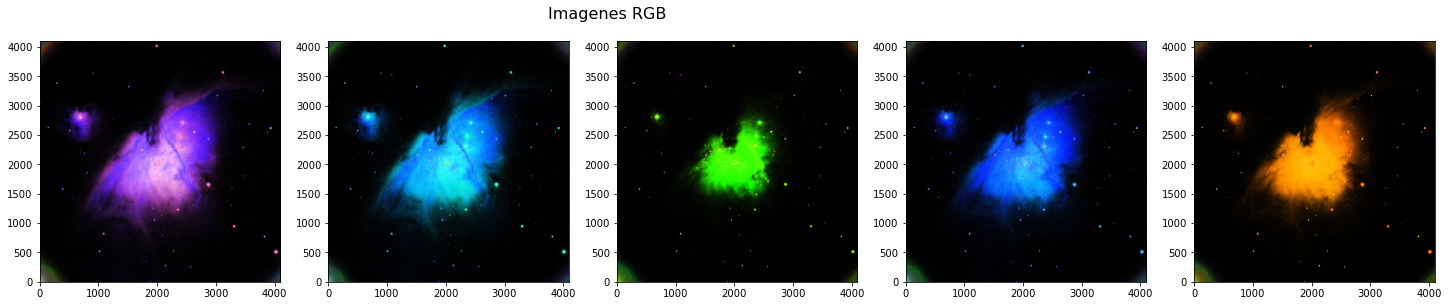

In [14]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imagenes RGB',x=0.44,fontsize=16)
ax[0].imshow(OrionRGB1,origin='lower')
ax[1].imshow(OrionRGB2,origin='lower')
ax[2].imshow(OrionRGB3,origin='lower')
ax[3].imshow(OrionRGB4,origin='lower')
ax[4].imshow(OrionRGB5,origin='lower')
fig.savefig('Imágenes RGB con mediana')

# Orion promedio

In [37]:
Orion_RGB1=make_lupton_rgb(Orion_sloan_r,Orion_V,Orion_sloan_g,minimum=9,Q=5,stretch=5,filename='Orion_mean1.jpeg')
Orion_RGB2=make_lupton_rgb(Orion_sloan_i,Orion_sloan_r,Orion_sloan_g,minimum=9,Q=5,stretch=5,filename='Orion_mean2.jpeg')
Orion_RGB3=make_lupton_rgb(Orion_sloan_i,Orion_V,Orion_B,minimum=9,Q=5,stretch=5,filename='Orion_mean3.jpeg')
Orion_RGB4=make_lupton_rgb(Orion_sloan_i,Orion_V,Orion_sloan_g,minimum=9,Q=5,stretch=5,filename='Orion_mean4.jpeg')
Orion_RGB5=make_lupton_rgb(Orion_sloan_r,Orion_V,Orion_B,minimum=9,Q=5,stretch=5,filename='Orion_mean5.jpeg')

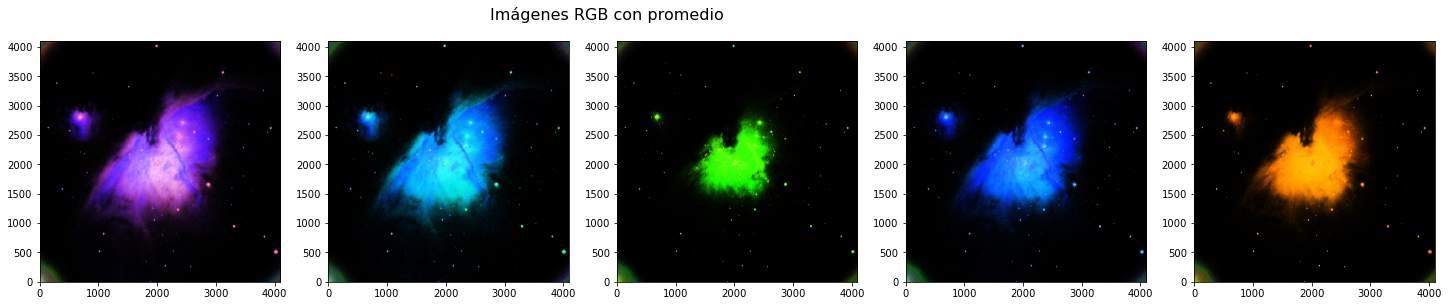

In [38]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imágenes RGB con promedio',x=0.44,fontsize=16)
ax[0].imshow(Orion_RGB1,origin='lower')
ax[1].imshow(Orion_RGB2,origin='lower')
ax[2].imshow(Orion_RGB3,origin='lower')
ax[3].imshow(Orion_RGB4,origin='lower')
ax[4].imshow(Orion_RGB5,origin='lower')
fig.savefig('Imágenes RGB con promedio')

# Orion Gauss Sharpened

In [32]:
OrionSharp1=make_lupton_rgb(Sharpened_Ga_Orionsloanr,Sharpened_Ga_OrionV,Sharpened_Ga_Orionsloang,minimum=9,Q=5,stretch=5,filename='OrionSharp1.jpeg')
OrionSharp2=make_lupton_rgb(Sharpened_Ga_Orionsloani,Sharpened_Ga_Orionsloanr,Sharpened_Ga_Orionsloanr,minimum=9,Q=5,stretch=5,filename='OrionSharp2.jpeg')
OrionSharp3=make_lupton_rgb(Sharpened_Ga_Orionsloani,Sharpened_Ga_OrionV,Sharpened_Ga_OrionB,minimum=9,Q=5,stretch=5,filename='OrionSharp3.jpeg')
OrionSharp4=make_lupton_rgb(Sharpened_Ga_Orionsloani,Sharpened_Ga_OrionV,Sharpened_Ga_Orionsloang,minimum=9,Q=5,stretch=5,filename='OrionSharp4.jpeg')
OrionSharp5=make_lupton_rgb(Sharpened_Ga_Orionsloanr,Sharpened_Ga_OrionV,Sharpened_Ga_OrionB,minimum=9,Q=5,stretch=5,filename='OrionSharp5.jpeg')

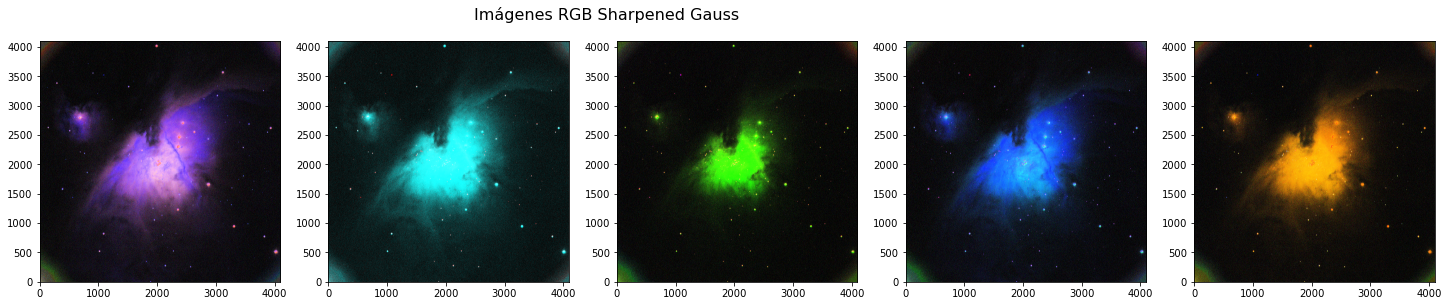

In [36]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imágenes RGB Sharpened Gauss',x=0.44,fontsize=16)
ax[0].imshow(OrionSharp1,origin='lower')
ax[1].imshow(OrionSharp2,origin='lower')
ax[2].imshow(OrionSharp3,origin='lower')
ax[3].imshow(OrionSharp4,origin='lower')
ax[4].imshow(OrionSharp5,origin='lower')
fig.savefig('Imágenes RGB con Sharpened Gauss')

## 47 Tucanae ##

In [40]:
Light_B2=Fits_Array(Lb2)
Light_sloan_g2=Fits_Array(Lsg2)
Light_sloan_i2=Fits_Array(Lsi2)
Light_sloan_r2=Fits_Array(Lsr2)
Light_V2=Fits_Array(Lv2)

In [41]:
Raw_Tuca_B=np.mean(Light_B2,axis=2)
Raw_Tuca_V=np.mean(Light_V2,axis=2)
Raw_Tuca_sloan_i=np.mean(Light_sloan_i2,axis=2)
Raw_Tuca_sloan_g=np.mean(Light_sloan_g2,axis=2)
Raw_Tuca_sloan_r=np.mean(Light_sloan_r2,axis=2)

In [42]:
Tuca_B=(Raw_Tuca_B-Dark_Bias)/Norm_Master_Flat_B
Tuca_V=(Raw_Tuca_V-Dark_Bias)/Norm_Master_Flat_V
Tuca_sloan_r=(Raw_Tuca_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r
Tuca_sloan_i=(Raw_Tuca_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Tuca_sloan_g=(Raw_Tuca_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g

In [43]:
Tuca_RGB1=make_lupton_rgb(Tuca_sloan_r,Tuca_V,Tuca_sloan_g,minimum=9,Q=5,stretch=10,filename='Tucanae.jpeg')
Tuca_RGB2=make_lupton_rgb(Tuca_sloan_i,Tuca_sloan_r,Tuca_sloan_g,minimum=9,Q=5,stretch=10,filename='Tucanae2.jpeg')
Tuca_RGB3=make_lupton_rgb(Tuca_sloan_i,Tuca_V,Tuca_B,minimum=9,Q=5,stretch=10,filename='Tucanae3.jpeg')
Tuca_RGB4=make_lupton_rgb(Tuca_sloan_i,Tuca_V,Tuca_sloan_g,minimum=9,Q=5,stretch=10,filename='Tucanae4.jpeg')
Tuca_RGB5=make_lupton_rgb(Tuca_sloan_r,Tuca_V,Tuca_B,minimum=9,Q=5,stretch=10,filename='Tucanae5.jpeg')

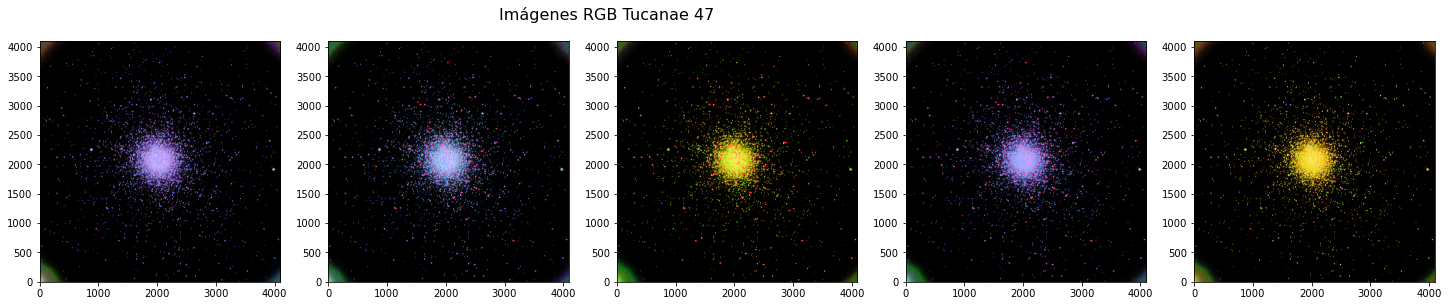

In [74]:
fig,ax=plt.subplots(1,5,figsize=(25,4.5))
fig.suptitle('Imágenes RGB Tucanae 47',x=0.44,fontsize=16)
ax[0].imshow(Tuca_RGB1,origin='lower')
ax[1].imshow(Tuca_RGB2,origin='lower')
ax[2].imshow(Tuca_RGB3,origin='lower')
ax[3].imshow(Tuca_RGB4,origin='lower')
ax[4].imshow(Tuca_RGB5,origin='lower')
fig.savefig('Imágenes RGB Tucanae.jpeg')

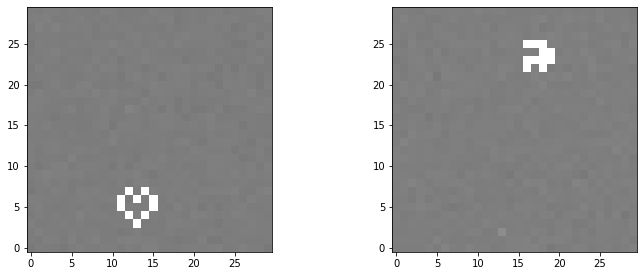

In [29]:
fig,ax=plt.subplots(1,2,figsize=(12,4.5))
ax[0].imshow(Rayos_Orion_V[420:450,330:360,0],origin='lower',cmap='gray',vmin=Rayos_Orion_V[:,:,0].mean()-Rayos_Orion_V[:,:,0].std(),vmax=Rayos_Orion_V[:,:,0].mean()+Rayos_Orion_V[:,:,0].std())
ax[1].imshow(Rayos_Orion_V[1320:1350,1320:1350,0],origin='lower',cmap='gray',vmin=Rayos_Orion_V[:,:,0].mean()-Rayos_Orion_V[:,:,0].std(),vmax=Rayos_Orion_V[:,:,0].mean()+Rayos_Orion_V[:,:,0].std())